<a href="https://colab.research.google.com/github/ayumawaddawarohma/Coursera_NLP_specialized/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
You will be doing sentiment analysis on tweets in the first two weeks of this course. To help with that, we will be using the Natural Language Toolkit (NLTK) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data, and you will be acquainted with them as we move along the course.

In [2]:
# import library NLTK

import nltk
from nltk.corpus import twitter_samples # samples twitter dataset fromNLTK
import matplotlib.pyplot as plt 
import random # pseudo random number generator

# Load dataset and dataset distribution

twitter dataset from NLTK is seperated into positive and negativ tweets. It contains 5000 postives and negative tweets,this dataset have exact match between classes to avoid imbalanced dataset.

In [3]:
# code for download dataset in local computer
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# select the set of positive and negative tweets
all_PositiveTweets= twitter_samples.strings('positive_tweets.json')
all_NegativeTweets = twitter_samples.strings('negative_tweets.json')

In [9]:
# print stucture dataset 

print('Number of postive tweets : ', len(all_PositiveTweets))
print('Number of negative tweets : ', len(all_NegativeTweets))

print('\nType of postive_tweets : ', type(all_PositiveTweets))
print('type of negative_tweets : ', type(all_NegativeTweets))

print('\ntype of a tweets entry is :', type(all_NegativeTweets[0]))

Number of postive tweets :  5000
Number of negative tweets :  5000

Type of postive_tweets :  <class 'list'>
type of negative_tweets :  <class 'list'>

type of a tweets entry is : <class 'str'>


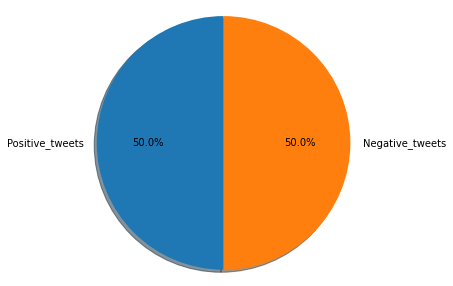

In [10]:
# make visualizations dataset using matplotlib library - pie chart

# declare figure with a custom size
fig = plt.figure(figsize=(5,5))

# create labels for data
labels = 'Positive_tweets', 'Negative_tweets'

# size for each slide 
sizes = [len(all_PositiveTweets),len(all_NegativeTweets)]

# create pie chart 
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)

#equal aspect ration 
plt.axis('equal')

# display the chart 
plt.show()

In [12]:
# looking at raw texts to understanding the data
#referece for coloring text :https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python

# print postive in green 
print('\033[92m' + all_PositiveTweets[random.randint(0,5000)])

# print negative in red 
# print negative in red
print('\033[91m' + all_NegativeTweets[random.randint(0,5000)])

@occeaneweb thanks for following :)
@zoellaftmendes but why? :(


# Pre-Processing

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

1. Tokenizing the string
2. Lowercasing
3. Removing stop words and punctuation
4. Stemming


In [13]:
# selected sample of tweets from dataset 
tweet = all_PositiveTweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [14]:
# download the stopwords from NLTK 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import re #library for regex  
import string # for string operations

from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
from nltk.tokenize import TweetTokenizer 

In [19]:
# Remove hyperlinks, Twitter marks and styles

print('\033[92m'+ tweet)
print('\033[94m')

# remove style retweet 
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2= re.sub(r'https?://[^\s\n\r]+', '',tweet2)

#remove hastag
tweet2 = re.sub(r'#', '',tweet2)

print(tweet2)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## Tokenize the string  
To tokenize means to split the strings into individual words without blanks or tabs


In [23]:

print('\033[92m'+ tweet2)
print('\033[94m')

# instantiate tokenizer class
tokinizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokinizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Remove stop words and punctuations

In [25]:
stopwords_english = stopwords.words('english')

print('Stopwords\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [26]:
#  clean up our tokenized tweet

print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens :
  if (word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print('remove stop words and puctuation : ')
print(tweets_clean)





['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

remove stop words and puctuation : 
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming 
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary

In [27]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# instantiate stemming class
stemmer =PorterStemmer()

# create an empty list to store the stems
tweets_stem = []

for word in tweets_clean :
  steem_word = stemmer.stem(word)
  tweets_stem.append(steem_word)

print('stemmed words:')
print(tweets_stem)  



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


***prepocessing consists of multiple steps before we get the final list of words. So we can make function for processing tweets. ***

# Make Function for Pre-Processing 

In [ ]:
# import re
# import string
# import numpy as np

# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer

# load this library before run function

In [30]:
def process_tweet(tweet):
  """ Process tweet function
  input : 
    tweet : a string containing a tweet
  output 
    tweet_clean : a list of words containing the processed tweet
  """

  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks    
  tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
   # tokenize tweets
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
      if (word not in stopwords_english and  # remove stopwords
              word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

  return tweets_clean

## how to use this function

In [32]:
tweet = all_PositiveTweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the function
tweet_processing = process_tweet(tweet);

print('preprocessed tweet:')
print(tweet_processing) # Print the result




My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
